<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/Day05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21장 판다스 통계 함수 맛보기

- 시리즈와 데이터프레임 이해하기
    - 집단화 함수 (통계함수와 밀접하게 사용)
    ```
    ex) 각 출생년도 별로 기대수명 평균 구하기
    ```      
    - Groupby 함수 소개
    ```
    판다스에서 제공하는 데이터프레임을 집단별로 나누어주는 함수
    각 집단별로 통계값을 구할 대 유용하게 사용 가능
    ```      
    - Groupby 통계 함수
    ```
    count : 누락값을 제외한 데이터 수
    size : 누락값을 포함한 데이터 수
    mean : 평균
    std : 표준편차
    min : 최소값
    max : 최대값
    sum : 전체 합
    var : 분산
    describe : 요약 통계량
    first : 첫번째 행
    last : 마지막 행
    ```

In [1]:
# gapminder.tsv
import pandas as pd

In [2]:
df = pd.read_csv("gapminder.tsv", sep = '\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [3]:
# 집단화 하고싶은 열 이름
result = df.groupby('year')['lifeExp'].mean()
result

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

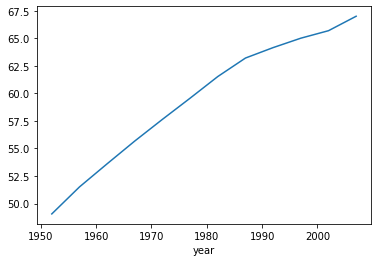

In [4]:
#선그래프
result.plot()

In [5]:
# 이중 집단화 하고싶은 열 이름
result2 = df.groupby(['year','continent'])['lifeExp'].mean()
result2

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

In [6]:
df.groupby("continent")['country'].nunique() #n : 특정한 것을 세다(집합처리를 해서 세어줌, 중복 허용x)

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

# 22장 시리즈와 데이터프레임 다루기


- 데이터프레임에서 열에 접근하기
    ```
    접근할때 [] 사용

    df[열]
    df[[열1, 열2]]
    ```      
- 데이터프레임에서 행, 열에 접근하기
    ```
    loc : 이름으로 접근
    iloc : 순서로 접근

    loc[0] :행이름 0에 접근
    iloc[0] : 0번째 행에 접근
    loc[[0, 10, 100, 1000]] : 0,10,100,1000 이라고 적힌 행에 접근
    iloc[[0, 10, 100, 1000]] : 0,10,100,1000 번째 행에 접근

    loc[[0,10,100],["year"]] : year열에 접근
    iloc[[0,10,100],[0,2]] : 0,2번째 열에 접근
    ```      
- 데이터프레임에서 내가 원하는 행만 추출하기
    ```
    df[조건]
    df[(조건1) & (조건2)] : 모두 만족하는 행
    df[(조건1) | (조건2)] : 하나라도 만족하는 행
    ```    
- 데이터프레임의 머리 부분 추출
    ```
    df.head() : 앞쪽 일부분만 보여줌 (5~6개)
    df.head(n=10) : 보고싶은 개수만큼 보여줌
    ```
- 데이터프레임의 꼬리 부분 추출
    ```
    df.tail() : 뒤쪽 일부분만 보여줌 (5~6개)
    df.tail(n=10) : 보고싶은 개수만큼 보여줌
    ```
- 데이터프레임의 모양 확인
    ```
    df.shape
    ```
- 데이터프레임의 열 이름 확인
    ```
    df.columns
    ```
- 데이터프레임의 열 자료형 확인 (중요)
    ```
    df.dtypes
    ```
- 데이터프레임의 모양 확인
    ```
    df.shape
    object : 문자열
    int : 숫자형
    float : 실수형
    ```
- 데이터프레임의 정보 확인
    ```
    type, 용량, 크기 등 확인
    df.info
    ```
- 시리즈 통계 함수
    ```
    s.mean()
    s.std()
    s.median()
    s.describe() : 요약통계량
    s.max()
    s.min()   
    ```
- 시리즈 중복데이터 삭제하기
    ```
    s.drop_duplicates()
    df.drop_duplicates()
    ```
- 시리즈 특정 값 바꾸기
    ```
    s.replace(값, 변경값)
    ```
- 시리즈 랜덤 샘플 추출
    ```
    s.sample(n)
    랜덤으로 n개의 샘플 추출
    ```
- 정렬하기
    ```
    s.sort_values() 오름차순
    s.sort_values(ascending=False) 내림차순
    
    s.sort_index() 행번호
    s.sort_index(ascending=False) 내림차순 행번호
    ```
- 시리즈 프레임화
    ```
    s.to_frame()
    ```
- 시간 데이터 변환
    ```
    pd.to_datetime() 함수 : 문자열로 된 날짜 데이터를 시간 데이터로 변환
    ```

In [7]:
# person_info.csv
import pandas as pd

In [8]:
df = pd.read_csv("person_info.csv", encoding='euc-kr')
df

,이름,출생일,사망일,나이,직업
0,홍길동,1920-07-25,1958-04-16,37,회사원
1,이순신,1876-06-13,1937-10-16,61,군인
2,이홍길,1820-05-12,1910-08-13,90,의사
3,곽재우,1867-11-07,1934-07-04,66,연구원
4,신나라,1907-05-27,1964-04-14,56,연구원
5,오기영,1813-03-15,1858-06-16,45,연구원
6,기충현,1912-06-23,1954-06-07,41,회사원
7,심기한,1777-04-30,1855-02-23,77,백수


In [9]:
df['이름']

0    홍길동
1    이순신
2    이홍길
3    곽재우
4    신나라
5    오기영
6    기충현
7    심기한
Name: 이름, dtype: object

In [10]:
df[['이름', '나이', '직업']]

,이름,나이,직업
0,홍길동,37,회사원
1,이순신,61,군인
2,이홍길,90,의사
3,곽재우,66,연구원
4,신나라,56,연구원
5,오기영,45,연구원
6,기충현,41,회사원
7,심기한,77,백수


In [11]:
# 행
df.loc[0]

이름            홍길동
출생일    1920-07-25
사망일    1958-04-16
나이             37
직업            회사원
Name: 0, dtype: object

In [12]:
df.iloc[0]

이름            홍길동
출생일    1920-07-25
사망일    1958-04-16
나이             37
직업            회사원
Name: 0, dtype: object

In [13]:
df.iloc[-1]

이름            심기한
출생일    1777-04-30
사망일    1855-02-23
나이             77
직업             백수
Name: 7, dtype: object

In [14]:
df.loc[[0,5], ['이름','직업']]

,이름,직업
0,홍길동,회사원
5,오기영,연구원


In [15]:
df.iloc[[0,5],[0,4]]

,이름,직업
0,홍길동,회사원
5,오기영,연구원


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      8 non-null      object
 1   출생일     8 non-null      object
 2   사망일     8 non-null      object
 3   나이      8 non-null      int64 
 4   직업      8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


In [17]:
# 출생일 날짜로 인식
df['출생일'] = pd.to_datetime(df['출생일'])
df['사망일'] = pd.to_datetime(df['사망일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   이름      8 non-null      object        
 1   출생일     8 non-null      datetime64[ns]
 2   사망일     8 non-null      datetime64[ns]
 3   나이      8 non-null      int64         
 4   직업      8 non-null      object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 448.0+ bytes


In [18]:
df['생존일'] = df['사망일'] - df['출생일']
df

,이름,출생일,사망일,나이,직업,생존일
0,홍길동,1920-07-25,1958-04-16,37,회사원,13779 days
1,이순신,1876-06-13,1937-10-16,61,군인,22404 days
2,이홍길,1820-05-12,1910-08-13,90,의사,32964 days
3,곽재우,1867-11-07,1934-07-04,66,연구원,24345 days
4,신나라,1907-05-27,1964-04-14,56,연구원,20777 days
5,오기영,1813-03-15,1858-06-16,45,연구원,16529 days
6,기충현,1912-06-23,1954-06-07,41,회사원,15324 days
7,심기한,1777-04-30,1855-02-23,77,백수,28422 days


In [19]:
df.head()

,이름,출생일,사망일,나이,직업,생존일
0,홍길동,1920-07-25,1958-04-16,37,회사원,13779 days
1,이순신,1876-06-13,1937-10-16,61,군인,22404 days
2,이홍길,1820-05-12,1910-08-13,90,의사,32964 days
3,곽재우,1867-11-07,1934-07-04,66,연구원,24345 days
4,신나라,1907-05-27,1964-04-14,56,연구원,20777 days


In [20]:
df.tail()

,이름,출생일,사망일,나이,직업,생존일
3,곽재우,1867-11-07,1934-07-04,66,연구원,24345 days
4,신나라,1907-05-27,1964-04-14,56,연구원,20777 days
5,오기영,1813-03-15,1858-06-16,45,연구원,16529 days
6,기충현,1912-06-23,1954-06-07,41,회사원,15324 days
7,심기한,1777-04-30,1855-02-23,77,백수,28422 days


In [21]:
df.columns

Index(['이름', '출생일', '사망일', '나이', '직업', '생존일'], dtype='object')

In [22]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [23]:
name = df['이름']
name

0    홍길동
1    이순신
2    이홍길
3    곽재우
4    신나라
5    오기영
6    기충현
7    심기한
Name: 이름, dtype: object

In [24]:
name.replace("홍길동","강동원")

0    강동원
1    이순신
2    이홍길
3    곽재우
4    신나라
5    오기영
6    기충현
7    심기한
Name: 이름, dtype: object

In [25]:
age = df['나이']
age

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: 나이, dtype: int64

In [26]:
age.mean()

59.125

In [27]:
age.median()

58.5

In [28]:
age.max()

90

In [29]:
age.min()

37

In [30]:
age.std()

18.325918413937288

In [31]:
df

,이름,출생일,사망일,나이,직업,생존일
0,홍길동,1920-07-25,1958-04-16,37,회사원,13779 days
1,이순신,1876-06-13,1937-10-16,61,군인,22404 days
2,이홍길,1820-05-12,1910-08-13,90,의사,32964 days
3,곽재우,1867-11-07,1934-07-04,66,연구원,24345 days
4,신나라,1907-05-27,1964-04-14,56,연구원,20777 days
5,오기영,1813-03-15,1858-06-16,45,연구원,16529 days
6,기충현,1912-06-23,1954-06-07,41,회사원,15324 days
7,심기한,1777-04-30,1855-02-23,77,백수,28422 days


In [32]:
df[df['직업'] == '연구원']

,이름,출생일,사망일,나이,직업,생존일
3,곽재우,1867-11-07,1934-07-04,66,연구원,24345 days
4,신나라,1907-05-27,1964-04-14,56,연구원,20777 days
5,오기영,1813-03-15,1858-06-16,45,연구원,16529 days


In [33]:
df[(df['직업'] == '연구원') & (df['나이'] > df['나이'].mean())]

,이름,출생일,사망일,나이,직업,생존일
3,곽재우,1867-11-07,1934-07-04,66,연구원,24345 days


In [34]:
df['출생일'].dt.year

0    1920
1    1876
2    1820
3    1867
4    1907
5    1813
6    1912
7    1777
Name: 출생일, dtype: int64

In [35]:
df['출생일'].dt.month

0     7
1     6
2     5
3    11
4     5
5     3
6     6
7     4
Name: 출생일, dtype: int64

In [36]:
df['출생일'].dt.day

0    25
1    13
2    12
3     7
4    27
5    15
6    23
7    30
Name: 출생일, dtype: int64

# 23장 데이터를 저장하고 불러오는 방법

- CSV, TSV 파일 불러오기
    ```
    pd.read_csv(파일이름.csv)
    pd.read_csv(파일이름.tsv, sep='\t')

    매개변수
    encoding : 문자표현방식(한글이 껴있을 때 문제 발생)
        - 유니코드, CP949, euc-kr ...
    sep : 데이터를 읽어올 떄 구분자
    ```      
- 엑셀 파일 불러오기
    ```
    pd.read_excel(파일이름.xlsx, sheet_name = 시트이름) 
        - sheet1이 아닌경우는 적어주어야 함
        - 셀 병합이 되어있는 경우 불러오기 불가
    ```      
- Pickle 파일 불러오기
    ```
    pd.read_pickle(파일이름.pickle)
        - 저장을 위한 저장에 사용
        - 데이터 분석용으로 쓰며, 속도도빠르고 낮은 용량
        - 단점 : 실행시켜서 데이터를 볼 수 없음
    ```
- CSV 파일로 저장하기
    ```
    df.to_csv(파일이름.csv)

    매개변수
    index = True/False : 인덱스 유무 (행번호 표시/지우기)
    ```
- TSV 파일로 저장하기
    ```
    df.to_csv(파일이름.tsv, sep='\t')
    ```
- 엑셀 파일로 저장하기
    ```
    df.to_excel(파일이름.xlsx)
    ```
- Pickle 파일로 저장하기
    ```
    df.to_pickle(파일이름.pickle)
    ```

In [37]:
# person_info.csv 
import pandas as pd

In [38]:
# 한글문제 : utf-8 (유니코드), cp949, euc-kr
df = pd.read_csv("person_info.csv", encoding = 'cp949')
df

,이름,출생일,사망일,나이,직업
0,홍길동,1920-07-25,1958-04-16,37,회사원
1,이순신,1876-06-13,1937-10-16,61,군인
2,이홍길,1820-05-12,1910-08-13,90,의사
3,곽재우,1867-11-07,1934-07-04,66,연구원
4,신나라,1907-05-27,1964-04-14,56,연구원
5,오기영,1813-03-15,1858-06-16,45,연구원
6,기충현,1912-06-23,1954-06-07,41,회사원
7,심기한,1777-04-30,1855-02-23,77,백수


In [39]:
df.to_csv("my_data2.csv")

In [40]:
df.to_excel("my_data2.xlsx", index=False)

In [41]:
df2 = pd.read_excel("my_data2.xlsx")
df2
# unnamed 열 생성됨
# 따라서 data 저장할 때  index=False 넣어주는것이 좋음

,이름,출생일,사망일,나이,직업
0,홍길동,1920-07-25,1958-04-16,37,회사원
1,이순신,1876-06-13,1937-10-16,61,군인
2,이홍길,1820-05-12,1910-08-13,90,의사
3,곽재우,1867-11-07,1934-07-04,66,연구원
4,신나라,1907-05-27,1964-04-14,56,연구원
5,오기영,1813-03-15,1858-06-16,45,연구원
6,기충현,1912-06-23,1954-06-07,41,회사원
7,심기한,1777-04-30,1855-02-23,77,백수


In [42]:
df2.to_pickle("my_data2.pickle")

In [43]:
pd.read_pickle("my_data2.pickle")

,이름,출생일,사망일,나이,직업
0,홍길동,1920-07-25,1958-04-16,37,회사원
1,이순신,1876-06-13,1937-10-16,61,군인
2,이홍길,1820-05-12,1910-08-13,90,의사
3,곽재우,1867-11-07,1934-07-04,66,연구원
4,신나라,1907-05-27,1964-04-14,56,연구원
5,오기영,1813-03-15,1858-06-16,45,연구원
6,기충현,1912-06-23,1954-06-07,41,회사원
7,심기한,1777-04-30,1855-02-23,77,백수


# 24장 데이터 시각화가 필요한 이유

- 데이터 시각화가 필요한 이유
    - 만약 평균, 표준편차 등 수치만으로 봤을 때 완전 똑같은 4개의 데이터 집단이 있다면, 4개의 데이터 집단은 모두 같은 데이터 집단일까?
- 대표적인 파이썬 데이터 시각화 라이브러리
    ```
    matplotlib : 그래프(커스터마이징 유리, 겹쳐서 그리기 좋음 / 디자인 감각 필요, 어려움)
    seaborn : 데이터 분석 연습용 (연습용 data + 가시화 함수) + 쉽고 자동으로 그려줌 / 커스터마이징 어려움
    pandas : 가시화함수 (간단한 그림을 그릴때 유용)
            - .plot() 
    ```
- 데이터 시각화 라이브러리 불러오기
    ```
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd 
    ```      
- 데이터 시각화 하기

    그림을 그리기 위한 도화지 준비
    ```
    fig = plt.figure()
    ```

    subplot 준비  
    ```   
    ax1 = fig.add_subplot(2, 2, 1)
        - 2행 2열의 1번째
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)
    ```

    그림함수 그리기
    ```
    ax1.그림함수()
    ax2.그림함수()
    ax3.그림함수()
    ax4.그림함수()
    ```
    
    제목 설정
    ```
    ax1.set title(제목)
    fig_suptitle(제목)  - 메인 제목 설정
    ```

    겹치지 않도록 해주는 함수
    ```
    fig.tight_layout()
    ```

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [45]:
# 앤스컴 : 평균과, 표준편차, 상관계수, 회귀계수 다 같은 data
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [46]:
data1 = anscombe[anscombe['dataset'] == 'I']
data2 = anscombe[anscombe['dataset'] == 'II']
data3 = anscombe[anscombe['dataset'] == 'III']
data4 = anscombe[anscombe['dataset'] == 'IV']

In [47]:
data1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [48]:
data4

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91


In [49]:
print(data1.mean())
print(data2.mean())
print(data3.mean())
print(data4.mean())

x    9.000000
y    7.500909
dtype: float64
x    9.000000
y    7.500909
dtype: float64
x    9.0
y    7.5
dtype: float64
x    9.000000
y    7.500909
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-p

In [50]:
print(data1.std())
print(data2.std())
print(data3.std())
print(data4.std())

x    3.316625
y    2.031568
dtype: float64
x    3.316625
y    2.031657
dtype: float64
x    3.316625
y    2.030424
dtype: float64
x    3.316625
y    2.030579
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-p

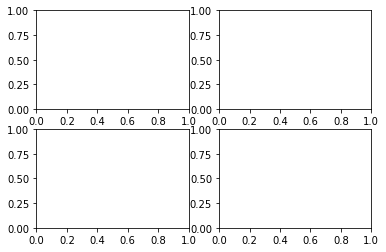

In [51]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

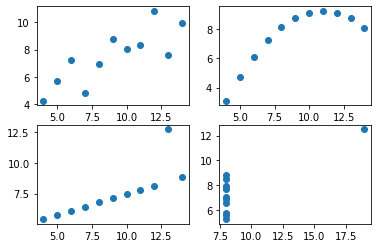

In [52]:
# 산점도 : 점으로 가시화된 데이터
ax1.scatter(data1['x'], data1['y'])
ax2.scatter(data2['x'], data2['y'])
ax3.scatter(data3['x'], data3['y'])
ax4.scatter(data4['x'], data4['y'])

fig

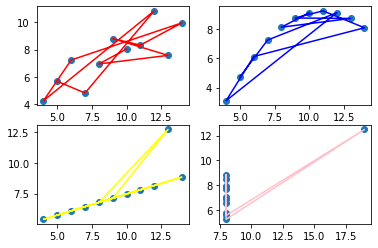

In [53]:
# 선그래프 plot, 덧붙여서 그려짐
ax1.plot(data1['x'], data1['y'], 'red')
ax2.plot(data2['x'], data2['y'], 'blue')
ax3.plot(data3['x'], data3['y'], 'yellow')
ax4.plot(data4['x'], data4['y'], 'pink')

fig

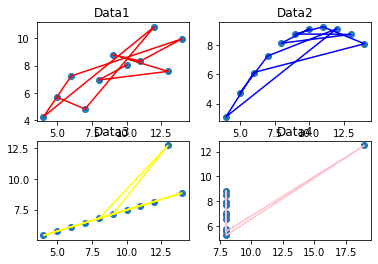

In [54]:
ax1.set_title("Data1")
ax2.set_title("Data2")
ax3.set_title("Data3")
ax4.set_title("Data4")

fig

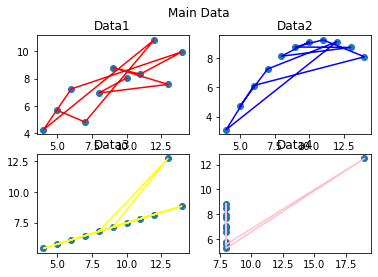

In [55]:
fig.suptitle("Main Data")
fig

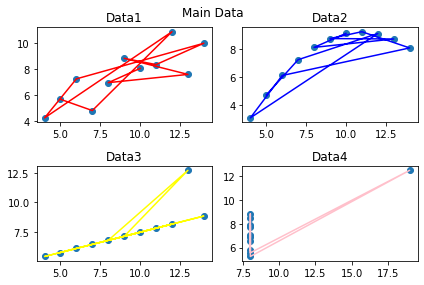

In [56]:
fig.tight_layout()
fig

# 25장 matplotlib 라이브러리를 활용해서 그래프 그리기

- matplotlib
    ```
    import matplotlib.pyplot as plt

    fig = plt.figure() : 도화지
    ax1 = fig.add_subplot(1, 1, 1)

    ax.그림함수(매개변수)
    ```

- 제목설정
    ```
    ax1.set_title(제목)
    ax1.set_xlabel(x축 이름)
    ax1.set_ylable(y축 이름)
    ```      
    


In [57]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


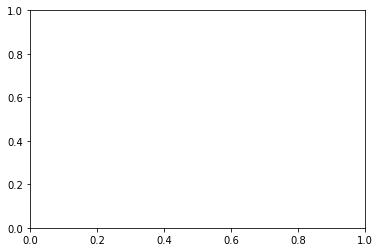

In [58]:
# total_bill : 음식값
fig=plt.figure() # 그림을 그리기 위한 도화지 준비

ax1 = fig.add_subplot(1,1,1)

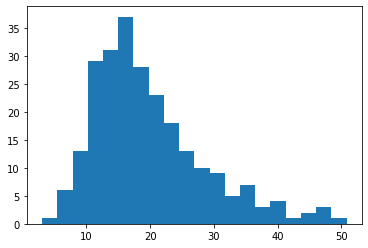

In [59]:
ax1.hist(tips['total_bill'], bins=20) #bins : 막대기 개수

fig

Text(0.5, 1.0, 'SCATTER')

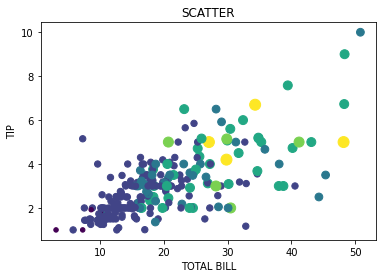

In [60]:
fig=plt.figure() # 그림을 그리기 위한 도화지 준비

ax1 = fig.add_subplot(1,1,1)

ax1.scatter(tips['total_bill'], tips['tip'], c=tips['size'], s=tips['size']* 20) #size마다 다른색상 표시, 사이즈별 크기 표시
ax1.set_xlabel("TOTAL BILL")
ax1.set_ylabel("TIP")
ax1.set_title("SCATTER")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a93005b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a9318d990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a93011190>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9a93137d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a9300f9d0>,
 'means': []}

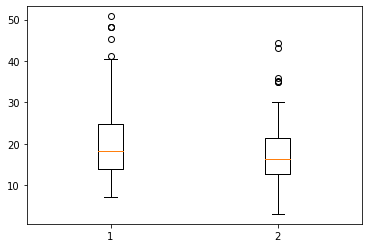

In [61]:
fig=plt.figure() # 그림을 그리기 위한 도화지 준비
ax1 = fig.add_subplot(1,1,1)

male = tips[tips['sex'] == 'Male']
Female = tips[tips['sex'] == 'Female']

ax1.boxplot([male['total_bill'], Female['total_bill']])

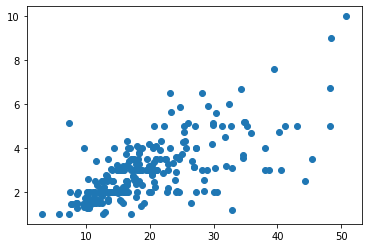

In [62]:
 plt.scatter(tips['total_bill'], tips['tip'])